## MONOD model

The model describes bacterial growth, see https://mjlaine.github.io/mcmcstat/ex/monodex.html.

The model reads as $y=\frac{ax}{(b+x)}+N(0,\sigma^2)$, where the parameters are $a$ and $b$ are fitted using measurements for $x$ and $y$.

In [1]:
import numpy as np
import pandas as pd
from thetafit import Parameter, optimize, sample
from thetafit.utils import McmcOptions, jacob
import matplotlib.pyplot as plt

In [2]:
data = {
    'x': np.array([28., 55., 83., 110., 138., 225., 375.]),
    'y': np.array([0.053, 0.060, 0.112, 0.105, 0.099, 0.122, 0.125]),
    'sig2': 1.0,
}

In [3]:
modelfun = lambda theta, x: theta['a']*x/(theta['b']+x)
ssfun    = lambda theta, data: sum((data['y']-modelfun(theta, data['x']))**2/data['sig2'])

In [4]:
th0 = {'a': 0.15, 'b': 100}

params = lambda theta: [
    Parameter('a', init=theta['a'], target=True),
    Parameter('b', init=theta['b'], target=True)
]

In [5]:
thopt, res = optimize(ssfun, data, params(th0))

In [6]:
print(thopt)

{'a': 0.14541945253897567, 'b': 49.05274598150096}


In [7]:
mse = res.fun/(len(data['y'])-2)
data['sig2'] = mse

In [8]:
J = jacob(modelfun, data['x'], params(thopt))
qcov = np.linalg.inv(J.T.dot(J))*mse

In [9]:
options = McmcOptions(nsimu=4000, qcov=qcov, adaptint=100, printint=500)

In [10]:
res, chain, sschain = sample(ssfun, data, params(thopt), options)

Sampling these parameters:
name	start	[min,max]
a	0.14541945253897567	[-inf,inf]
b	49.05274598150096	[-inf,inf]
i: 500, rejected: 56.8%, out of bounds: 0.0%
i: 1000, rejected: 61.6%, out of bounds: 0.0%
i: 1500, rejected: 64.1%, out of bounds: 0.0%
i: 2000, rejected: 63.4%, out of bounds: 0.0%
i: 2500, rejected: 64.6%, out of bounds: 0.0%
i: 3000, rejected: 64.6%, out of bounds: 0.0%
i: 3500, rejected: 64.9%, out of bounds: 0.0%


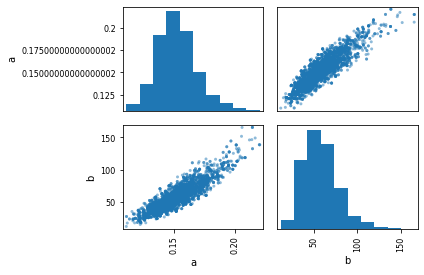

In [11]:
pd.plotting.scatter_matrix(chain)
plt.tight_layout()

In [12]:
xplot = np.linspace(0,400)
preds = np.stack([modelfun(chain.loc[i], xplot) for i in range(2000,4000,10)])

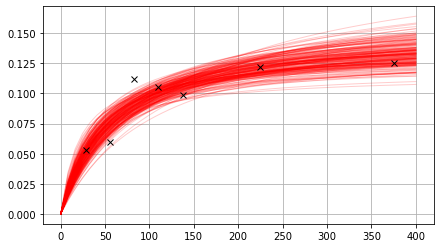

In [13]:
plt.figure(figsize=(7,4))

plt.plot(xplot, preds.T, 'r-', lw=1, alpha=0.2)
plt.plot(data['x'], data['y'], 'kx')

plt.grid(True)
plt.show()